In [3]:
!unzip 240.zip

Archive:  240.zip
   creating: 240/
   creating: 240/battery/
  inflating: 240/battery/battery1.jpg  
  inflating: 240/battery/battery10.jpg  
  inflating: 240/battery/battery100.jpg  
  inflating: 240/battery/battery101.jpg  
  inflating: 240/battery/battery102.jpg  
  inflating: 240/battery/battery103.jpg  
  inflating: 240/battery/battery104.jpg  
  inflating: 240/battery/battery105.jpg  
  inflating: 240/battery/battery106.jpg  
  inflating: 240/battery/battery107.jpg  
  inflating: 240/battery/battery108.jpg  
  inflating: 240/battery/battery109.jpg  
  inflating: 240/battery/battery11.jpg  
  inflating: 240/battery/battery110.jpg  
  inflating: 240/battery/battery111.jpg  
  inflating: 240/battery/battery112.jpg  
  inflating: 240/battery/battery113.jpg  
  inflating: 240/battery/battery114.jpg  
  inflating: 240/battery/battery115.jpg  
  inflating: 240/battery/battery116.jpg  
  inflating: 240/battery/battery117.jpg  
  inflating: 240/battery/battery118.jpg  
  inflating: 240/b

In [14]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [22]:
# Parameters
dataset_dir = "240"
num_classes = 6
num_epochs = 6
batch_size = 32
learning_rate = 0.001

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Data transforms
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [6]:
full_dataset = datasets.ImageFolder(root=dataset_dir, transform=train_transform)

In [7]:
val_ratio = 0.2
val_size = int(len(full_dataset) * val_ratio)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
val_dataset.dataset.transform = val_transform

In [8]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True, prefetch_factor=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [10]:
model = models.resnet18(pretrained=True)   # smaller & faster than resnet50


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


In [11]:
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(model.fc.in_features, num_classes)  # new final layer
model = model.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Epoch [1/6]
Train Loss   : 0.2214
Val Loss     : 0.2477
Accuracy     : 0.9043
Error        : 0.0957
F1 Score     : 0.9039
Precision    : 0.9034
Recall       : 0.9057



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Epoch [2/6]
Train Loss   : 0.2186
Val Loss     : 0.2548
Accuracy     : 0.9097
Error        : 0.0903
F1 Score     : 0.9096
Precision    : 0.9091
Recall       : 0.9102



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Epoch [3/6]
Train Loss   : 0.1995
Val Loss     : 0.2775
Accuracy     : 0.8914
Error        : 0.1086
F1 Score     : 0.8897
Precision    : 0.8956
Recall       : 0.8949



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Epoch [4/6]
Train Loss   : 0.1993
Val Loss     : 0.2538
Accuracy     : 0.9065
Error        : 0.0935
F1 Score     : 0.9061
Precision    : 0.9070
Recall       : 0.9080



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Epoch [5/6]
Train Loss   : 0.2061
Val Loss     : 0.2492
Accuracy     : 0.9086
Error        : 0.0914
F1 Score     : 0.9080
Precision    : 0.9095
Recall       : 0.9104



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Epoch [6/6]
Train Loss   : 0.2061
Val Loss     : 0.2587
Accuracy     : 0.9000
Error        : 0.1000
F1 Score     : 0.8992
Precision    : 0.9026
Recall       : 0.9022



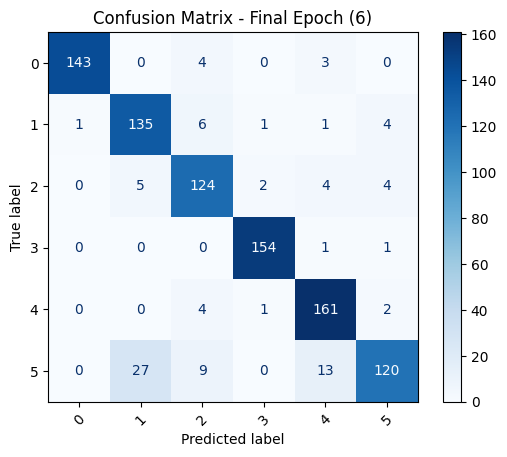

In [23]:
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * images.size(0)

    avg_train_loss = total_train_loss / len(train_loader.dataset)

    model.eval()
    all_preds, all_labels = [], []
    total_val_loss = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    accuracy = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean().item()
    error = 1 - accuracy
    f1 = f1_score(all_labels, all_preds, average="macro")
    precision = precision_score(all_labels, all_preds, average="macro")
    recall = recall_score(all_labels, all_preds, average="macro")

    print(f"\nEpoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss   : {avg_train_loss:.4f}")
    print(f"Val Loss     : {avg_val_loss:.4f}")
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Error        : {error:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"Precision    : {precision:.4f}")
    print(f"Recall       : {recall:.4f}\n")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title(f"Confusion Matrix - Final Epoch ({num_epochs})")
plt.show()
